In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LogNorm, Normalize

In [2]:
df = pd.read_csv("/groups/icecube/moust/storage/event_selections/event_no_numu_track_energy_15_200_nhits_4_400.csv")

In [8]:
df

,Unnamed: 0,event_no,count
0,0,6,24
1,1,20,35
2,2,28,37
3,3,32,58
4,4,54,70
...,...,...,...
708302,750389,7458089,12
708303,750390,7458096,40
708304,750391,7458111,28
708305,750392,7458127,20


In [20]:
len(df)

708307

In [23]:
df_8p = df[df["count"]  > 10]
len(df_8p)

607044

In [24]:
def df_to_train_test_val_selection(df,name, path, mod_num = 8):
    (df[df["count"]%mod_num <  1]["event_no"]).to_csv(path+name+"_train.csv",index= False)#header=False,
    (df[df["count"]%mod_num == 1]["event_no"]).to_csv(path+name+"_test.csv",index= False)
    (df[df["count"]%mod_num == 0]["event_no"]).to_csv(path+name+"_val.csv",index= False)

In [25]:
df_to_train_test_val_selection(df_8p, "event_no_numu_track_energy_15_200_nhits_10_400","/groups/icecube/moust/storage/event_selections/")

In [4]:
# df[df["count"]%7 == 0]

,Unnamed: 0,event_no,count
1,1,20,35
4,4,54,70
7,7,63,14
9,9,93,14
35,36,241,189
...,...,...,...
708292,750378,7457762,35
708293,750379,7457780,119
708295,750381,7457845,7
708304,750391,7458111,28


In [7]:
df.sort_values("count",ascending=False)

,Unnamed: 0,event_no,count
185308,196196,1968631,400
31944,33817,335287,400
644233,682410,6806646,400
566105,599729,6047983,400
622512,659372,6581000,400
...,...,...,...
476105,504399,5026612,4
680947,721333,7208178,4
528917,560438,5643388,4
549602,582288,5877301,4


In [8]:
len(df)

708307

In [9]:
df["count"].to_csv("/groups/icecube/moust/storage/event_selections/event_no_numu_track_energy_15_200_nhits_4_400_sorted.csv",header=False)

In [2]:
db_path = "/groups/icecube/petersen/GraphNetDatabaseRepository/Upgrade_Data/sqlite3/dev_step4_upgrade_028_with_noise_dynedge_pulsemap_v3_merger_aftercrash.db"
conn = sqlite3.connect(db_path)

# Create a DataFrame by querying the database and grouping by event_no
query = """
    SELECT 
        event_no, 
        COUNT(*) as count 
    FROM 
        SplitInIcePulses_dynedge_v2_Pulses 
    WHERE 
        event_no IN (
                    SELECT
                        event_no 
                    FROM 
                        truth
                    WHERE
                        abs(pid) == 14
                    AND 
                        interaction_type == 1
                    AND
                        energy BETWEEN 15 AND 200
                    )
    GROUP BY event_no"""
df = pd.read_sql_query(query, conn)
conn.close()

<AxesSubplot:>

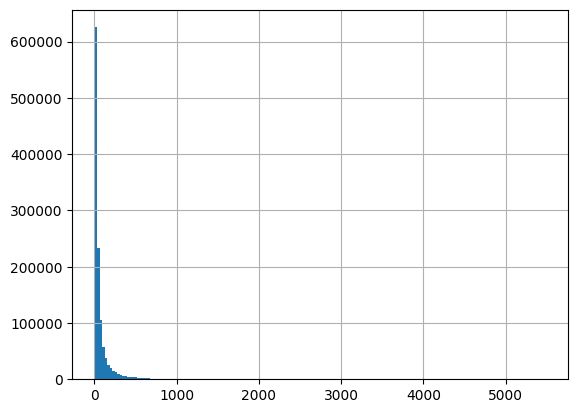

In [16]:
df[df['count'] > 4]['count'].hist(bins=180)

In [8]:
df["count"].max()

5487

In [13]:
len(df[df['count'] > 4000])

19

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267580 entries, 0 to 1267579
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   event_no  1267580 non-null  int64
 1   count     1267580 non-null  int64
dtypes: int64(2)
memory usage: 19.3 MB


In [19]:
len(df[df["count"].between(3000,3100)])

19

In [30]:
len(df[df['count'] > 400])/len(df)

0.031580649742028115

In [26]:
len(df[df['count'] < 4])/len(df)

0.03294229949983433

In [27]:
len(df[df["count"].between(4,1000)])/len(df)

0.9635226179018287

In [28]:
from sklearn.model_selection import train_test_split
df[df["count"].between(4,400)]
# numu_nhits_4_1000_train =  

,event_no,count
0,6,24
1,20,35
2,28,37
3,32,58
4,46,61
...,...,...
1267574,7458089,12
1267575,7458096,40
1267576,7458111,28
1267577,7458127,20
